# Importing Libraries

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import ensemble
import seaborn as sns
from matplotlib.pyplot import figure

# Data Acquisition

In [ ]:
df = pd.read_csv('data.csv',encoding='windows-1254')

In [ ]:
df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,Nausea,Pain,Pyrexia,Rash,Throat.tightness,Thrombosis,Tinnitus,Tremor,Urticaria,Vomiting
0,916710,2021-01-01,MO,23.0,23.0,NaN,F,NaN,"Acute appendicitis, onset morning of 1/1/2021 ...",NaN,...,False,False,False,False,False,False,False,False,False,False
1,916720,2021-01-01,NY,23.0,23.0,NaN,M,NaN,Patient made statements that he was having a h...,NaN,...,False,False,False,False,False,False,False,False,False,False
2,916741,2021-01-01,AR,68.0,68.0,NaN,F,NaN,"on dec 22 I felt some myalgias, chills, fatigu...",NaN,...,False,True,False,False,False,False,False,False,False,False
3,916772,2021-01-01,GA,55.0,55.0,NaN,M,NaN,Vaccine on 12/22/2020 and started feeling bad ...,NaN,...,False,False,False,False,False,False,False,False,False,False
4,916790,2021-01-01,TN,52.0,52.0,NaN,F,NaN,"Flushing, sweating, increased heart rate proce...",NaN,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
df.shape

(5279, 82)

In [ ]:
df.describe()

,VAERS_ID,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS
count,5.279000e+03,4343.000000,3154.00000,4.0,1151.000000,4519.000000,5279.000000
mean,9.694370e+05,57.122993,59.70038,0.0,3.286707,22.665634,1.996590
std,3.090224e+04,20.360390,20.79062,0.0,3.351753,680.312921,0.058299
min,9.167100e+05,1.080000,0.00000,0.0,1.000000,0.000000,1.000000
25%,9.412135e+05,40.000000,42.00000,0.0,1.000000,0.000000,2.000000
50%,9.733460e+05,56.000000,60.00000,0.0,2.000000,1.000000,2.000000
75%,9.950030e+05,74.000000,77.00000,0.0,4.000000,5.000000,2.000000
max,1.024853e+06,105.000000,105.00000,0.0,36.000000,36896.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 82 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   VAERS_ID                 5279 non-null   int64  
 1   RECVDATE                 5279 non-null   object 
 2   STATE                    4402 non-null   object 
 3   AGE_YRS                  4343 non-null   float64
 4   CAGE_YR                  3154 non-null   float64
 5   CAGE_MO                  4 non-null      float64
 6   SEX                      5279 non-null   object 
 7   RPT_DATE                 18 non-null     object 
 8   SYMPTOM_TEXT             5279 non-null   object 
 9   DIED                     799 non-null    object 
 10  DATEDIED                 740 non-null    object 
 11  L_THREAT                 551 non-null    object 
 12  ER_VISIT                 3 non-null      object 
 13  HOSPITAL                 1749 non-null   object 
 14  HOSPDAYS                

# DATA CLEANING

    # checking Null Values

In [ ]:
df.isnull().sum()

VAERS_ID         0
RECVDATE         0
STATE          877
AGE_YRS        936
CAGE_YR       2125
              ... 
Thrombosis       0
Tinnitus         0
Tremor           0
Urticaria        0
Vomiting         0
Length: 82, dtype: int64

It is concluded that many of the features i.e. columns have null values thus we will drop null values

# Visual Representation of Missing Values

<Axes: >

<Figure size 1000x800 with 0 Axes>

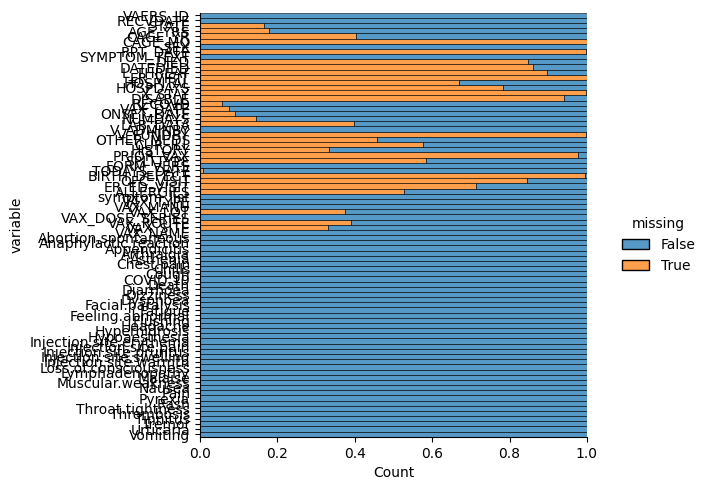

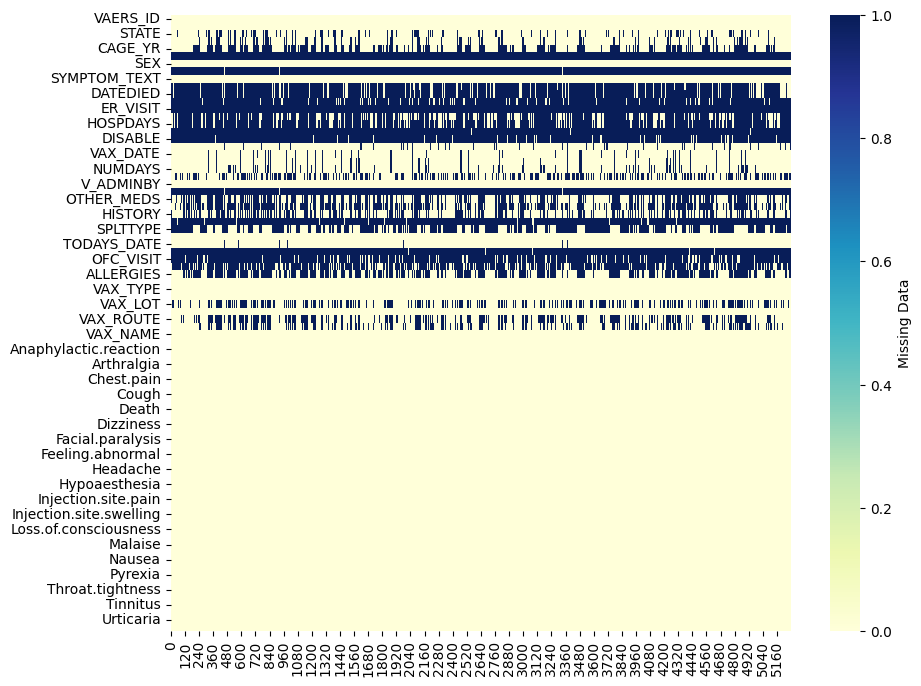

In [ ]:
# Bar graph for missing values plot
plt.figure(figsize=(10,8))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

# Heat Map for missing values
plt.figure(figsize=(10,8))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})


It can be seen that the ISNULL() function return True at place where the missing values exsit in the column thus the Columns with missing values are illustrated above

# FILLING METHOD


In [ ]:
f1= df.copy()

In [ ]:
# Replace empty string with NaN
df.replace('', np.nan, inplace=True)

# Fill null values with the median for numerical columns
f1.fillna(f1.median(), inplace=True)

# Fill null values with the mode for categorical columns
for column in f1.columns:
    if f1[column].dtype == 'object':
        f1[column].fillna(f1[column].mode()[0], inplace=True)

# f1.fillna(method='ffill', inplace=True)


<ipython-input-14-a3264205f620>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  f1.fillna(f1.median(), inplace=True)


In [ ]:
f1.shape

(5279, 82)

<Axes: >

<Figure size 1000x800 with 0 Axes>

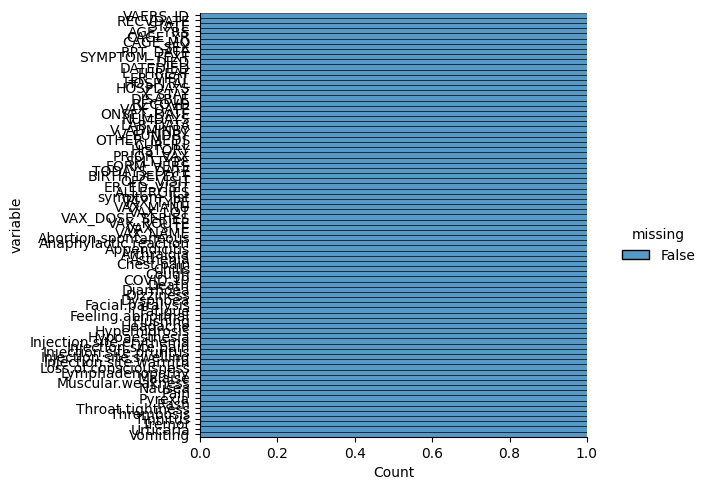

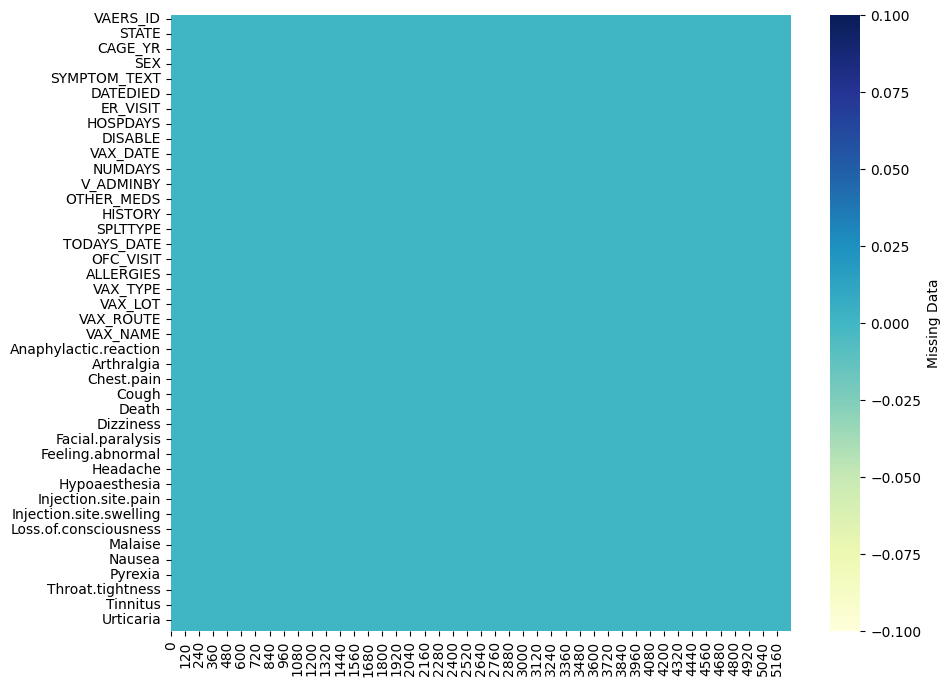

In [ ]:
# Bar Graph after filling the missing values
plt.figure(figsize=(10,8))
sns.displot(
    data=f1.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

# Heat Map after filling the missing values
plt.figure(figsize=(10,8))
sns.heatmap(f1.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})


It is concluded that from the filling method we have filling method requires less amount of data waste, whereas the row dropping method cause the data set to decarese it's size at the higher rate but the data integrity was maintained using the row dropping function.

# Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
# Applying Fit transform to each column
for i in f1.columns:
    f1[i]= le.fit_transform(f1[i])

In [ ]:
f1.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,Nausea,Pain,Pyrexia,Rash,Throat.tightness,Thrombosis,Tinnitus,Tremor,Urticaria,Vomiting
0,0,0,26,8,8,0,0,8,363,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,36,8,8,0,1,8,2299,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,2,53,53,0,0,8,4448,0,...,0,1,0,0,0,0,0,0,0,0
3,3,0,10,40,40,0,1,8,3557,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,45,37,37,0,0,8,1261,0,...,1,0,0,0,0,0,0,0,0,0


Now our data is fit for machine learning purpose


In [ ]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 82 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   VAERS_ID                 5279 non-null   int64
 1   RECVDATE                 5279 non-null   int64
 2   STATE                    5279 non-null   int64
 3   AGE_YRS                  5279 non-null   int64
 4   CAGE_YR                  5279 non-null   int64
 5   CAGE_MO                  5279 non-null   int64
 6   SEX                      5279 non-null   int64
 7   RPT_DATE                 5279 non-null   int64
 8   SYMPTOM_TEXT             5279 non-null   int64
 9   DIED                     5279 non-null   int64
 10  DATEDIED                 5279 non-null   int64
 11  L_THREAT                 5279 non-null   int64
 12  ER_VISIT                 5279 non-null   int64
 13  HOSPITAL                 5279 non-null   int64
 14  HOSPDAYS                 5279 non-null   int64
 15  X_ST

The types of all the columns are integers which are used for machine learning purposes, the object, boolean and floating values are converted into discrete integral values.

# FEATURE ENGINEERING

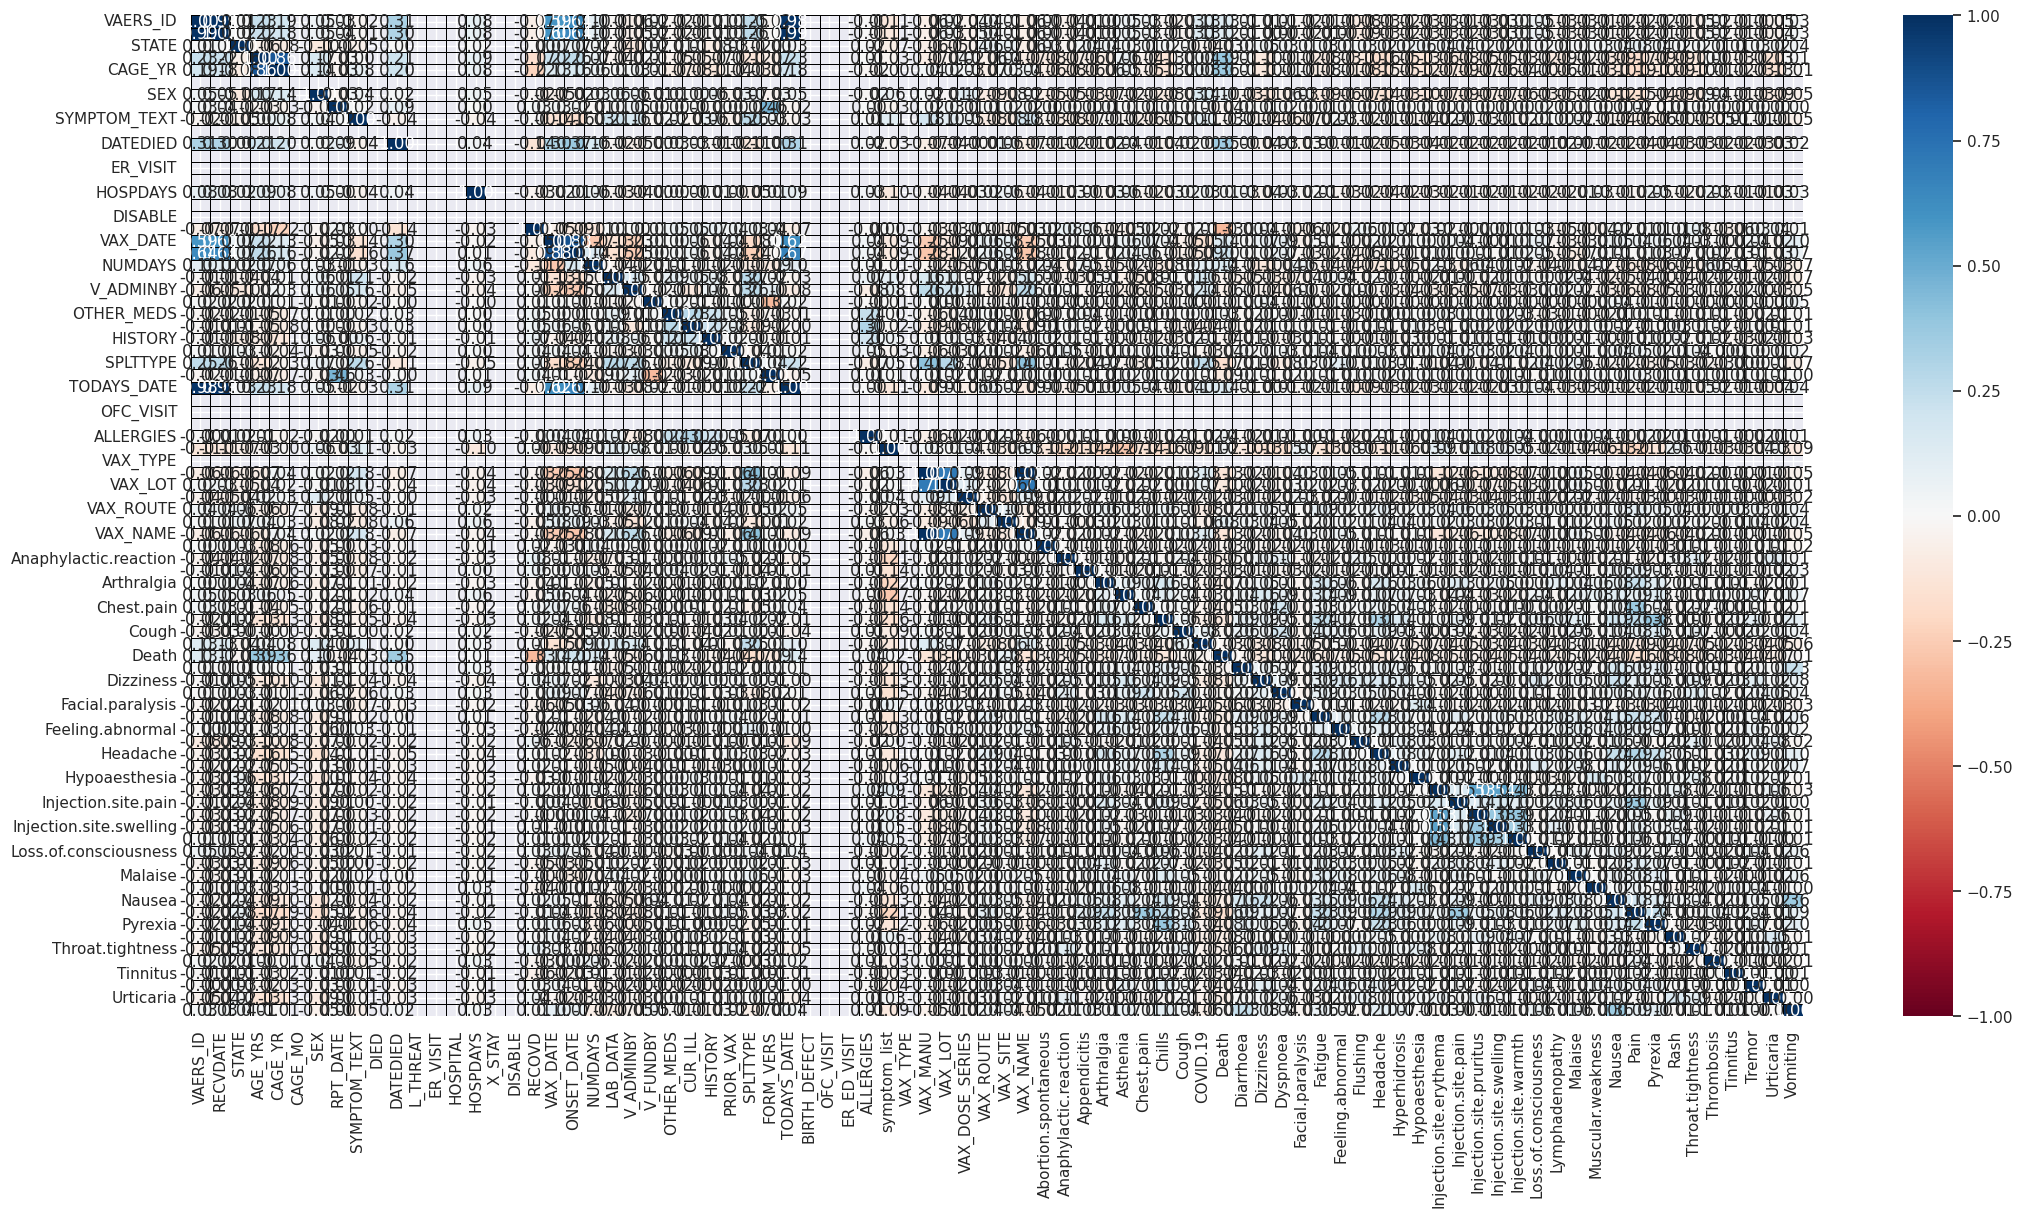

In [ ]:
corr_matrix = f1.corr()
sns.set(rc={'figure.figsize':(26,13)})
sns.heatmap(corr_matrix,  cmap='RdBu', vmin=-1, vmax=1, linewidths=0.5, linecolor='Black', annot =True, fmt='.2f')
plt.savefig('Correlation.jpg')
plt.show()


# Chosing Columns that are highly correlated

In [ ]:
# Printing list of features which are corelated to Appendictis in descending order
print(corr_matrix["Appendicitis"].sort_values(ascending=False).head(25))

Appendicitis       1.000000
Pain               0.094823
RECOVD             0.061563
Nausea             0.055355
NUMDAYS            0.045875
OTHER_MEDS         0.044637
STATE              0.041252
Lymphadenopathy    0.035293
Vomiting           0.034975
Pyrexia            0.028134
VAX_DOSE_SERIES    0.022223
CUR_ILL            0.018821
ONSET_DATE         0.014091
ALLERGIES          0.013422
Hyperhidrosis      0.013117
VAX_LOT            0.011427
HISTORY            0.009034
Malaise            0.008878
Chills             0.006868
FORM_VERS          0.005301
HOSPDAYS           0.002943
RPT_DATE           0.002445
VAX_ROUTE          0.002399
VAX_MANU           0.000479
VAX_NAME           0.000479
Name: Appendicitis, dtype: float64


# Creating a Dataframe with highly correlated features along with the target

In [ ]:
dataframe= f1[['Appendicitis','Pain','RECOVD','Nausea','NUMDAYS','OTHER_MEDS','STATE','Lymphadenopathy','Vomiting','Pyrexia']]

On the topic of binary-class classification, well-known methods are employed.
1.	Logistic Regression
2.	SVM
3.	Random forest
4.	Decision Tree
5.	Naive Bayes

If the predicted class is 0, appendices disease is believed to be absent. If the patient's predicted class is 1, then they have appendices.


### Split the data into X (features) and y (target) variables


In [ ]:
X = dataframe.drop('Appendicitis', axis=1) # Drop the target variable from X
y = dataframe['Appendicitis']

# Splitting the DATASET into:
## Training dataset that would be 80% of total data
## Testing  dataset that would be 20% of total data

In [ ]:
from sklearn.model_selection import train_test_split

# X and y are the feature and target matrices, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print( 'Shape of Xtrain: ' + str(X_train.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of X_test: ' + str(X_test.shape))
print('Shape of y_test: ' + str(y_test.shape))

Shape of Xtrain: (4223, 9)
Shape of y_train: (4223,)
Shape of X_test: (1056, 9)
Shape of y_test: (1056,)


# TRAINING THE MODELS

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# X_train and y_train are the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

# SVM

In [ ]:
from sklearn.svm import SVC

# X_train and y_train are the training data
svm = SVC()
svm.fit(X_train, y_train)


SVC()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# X_train and y_train are the training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# X_train and y_train are the training data
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# X_train and y_train are the training data
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

# Plotting the  Accuracy of the Models

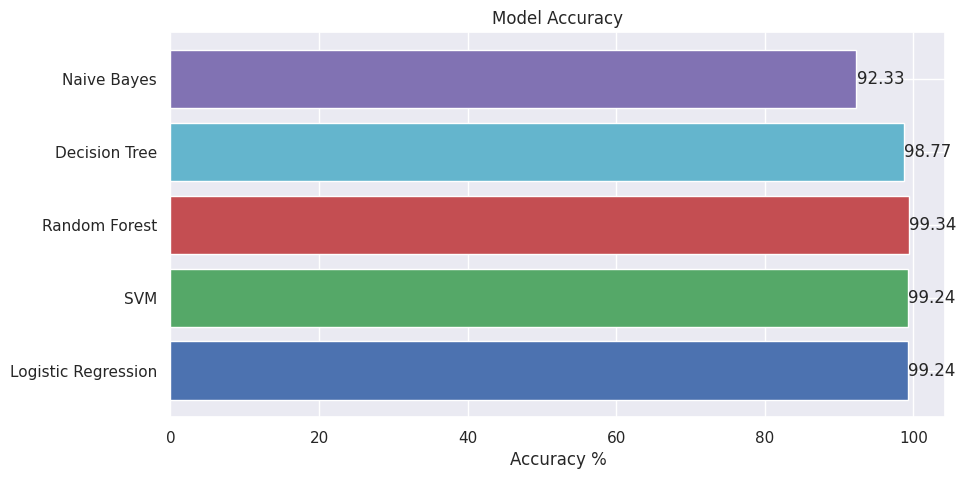

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set up a list of model names and instances
models = [
    ('Logistic Regression', lr),
    ('SVM', svm),
    ('Random Forest', rf),
    ('Decision Tree', dt),
    ('Naive Bayes', nb)
]

# Set up a list of colors for the plots
colors = ['b', 'g', 'r', 'c', 'm']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 5))

# Loop through each model and plot the accuracy
for i, (name, model) in enumerate(models):
    # Predict the target variable for the testing data
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = (model.score(X_test, y_test))*100

    # Plot the accuracy as a horizontal bar
    ax.barh(i, accuracy, color=colors[i])

    # Add the model name to the y-axis label
    ax.set_yticks(np.arange(len(models)))
    ax.set_yticklabels([name for name, _ in models])

    # Add the accuracy score to the bar
    ax.text(accuracy + 0.01, i, f'{accuracy:.2f}', ha='left', va='center')

# Set the x-axis label
ax.set_xlabel('Accuracy %')

# Set the title of the plot
ax.set_title('Model Accuracy')

# Display the plot
plt.show()


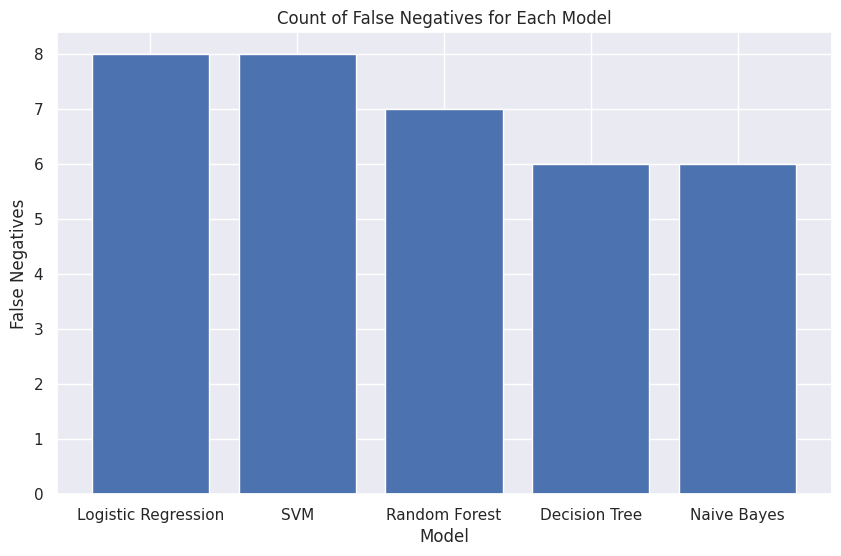

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted labels for each model
lr_predicted = lr.predict(X_test)
svm_predicted = svm.predict(X_test)
rf_predicted = rf.predict(X_test)
dt_predicted = dt.predict(X_test)
nb_predicted = nb.predict(X_test)

# Calculate false negatives for each model
lr_fn = np.sum((lr_predicted == 0) & (y_test == 1))
svm_fn = np.sum((svm_predicted == 0) & (y_test == 1))
rf_fn = np.sum((rf_predicted == 0) & (y_test == 1))
dt_fn = np.sum((dt_predicted == 0) & (y_test == 1))
nb_fn = np.sum((nb_predicted == 0) & (y_test == 1))

# Create a bar chart of false negatives for each model
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(['Logistic Regression', 'SVM', 'Random Forest', 'Decision Tree', 'Naive Bayes'],
       [lr_fn, svm_fn, rf_fn, dt_fn, nb_fn])
ax.set_xlabel('Model')
ax.set_ylabel('False Negatives')
ax.set_title('Count of False Negatives for Each Model')
plt.show()

# Preprocessing for D.L

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Appendicitis     5279 non-null   int64
 1   Pain             5279 non-null   int64
 2   RECOVD           5279 non-null   int64
 3   Nausea           5279 non-null   int64
 4   NUMDAYS          5279 non-null   int64
 5   OTHER_MEDS       5279 non-null   int64
 6   STATE            5279 non-null   int64
 7   Lymphadenopathy  5279 non-null   int64
 8   Vomiting         5279 non-null   int64
 9   Pyrexia          5279 non-null   int64
dtypes: int64(10)
memory usage: 412.5 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()


In [ ]:
for i in f1.columns:
    f1[i]= le.fit_transform(f1[i])


In [ ]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 82 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   VAERS_ID                 5279 non-null   int64
 1   RECVDATE                 5279 non-null   int64
 2   STATE                    5279 non-null   int64
 3   AGE_YRS                  5279 non-null   int64
 4   CAGE_YR                  5279 non-null   int64
 5   CAGE_MO                  5279 non-null   int64
 6   SEX                      5279 non-null   int64
 7   RPT_DATE                 5279 non-null   int64
 8   SYMPTOM_TEXT             5279 non-null   int64
 9   DIED                     5279 non-null   int64
 10  DATEDIED                 5279 non-null   int64
 11  L_THREAT                 5279 non-null   int64
 12  ER_VISIT                 5279 non-null   int64
 13  HOSPITAL                 5279 non-null   int64
 14  HOSPDAYS                 5279 non-null   int64
 15  X_ST

In [ ]:
f1.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,Nausea,Pain,Pyrexia,Rash,Throat.tightness,Thrombosis,Tinnitus,Tremor,Urticaria,Vomiting
0,0,0,26,8,8,0,0,8,363,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,36,8,8,0,1,8,2299,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,2,53,53,0,0,8,4448,0,...,0,1,0,0,0,0,0,0,0,0
3,3,0,10,40,40,0,1,8,3557,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,45,37,37,0,0,8,1261,0,...,1,0,0,0,0,0,0,0,0,0


# Deep Learning

## CNN

In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [ ]:
f1

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,Nausea,Pain,Pyrexia,Rash,Throat.tightness,Thrombosis,Tinnitus,Tremor,Urticaria,Vomiting
0,0,0,26,8,8,0,0,8,363,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,36,8,8,0,1,8,2299,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,2,53,53,0,0,8,4448,0,...,0,1,0,0,0,0,0,0,0,0
3,3,0,10,40,40,0,1,8,3557,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,45,37,37,0,0,8,1261,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5274,5209,41,26,75,75,0,0,8,2633,0,...,0,0,0,0,0,0,0,0,0,0
5275,5210,41,26,76,76,0,0,8,2633,0,...,0,0,0,0,0,0,0,0,0,0
5276,5211,41,26,71,71,0,0,8,2633,0,...,0,0,0,0,0,0,0,0,0,0
5277,5212,41,11,53,53,0,1,8,2457,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Split the dataset into features and target
X = f1.drop(columns=['Appendicitis'])
y = f1['Appendicitis']


In [ ]:
X

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,Nausea,Pain,Pyrexia,Rash,Throat.tightness,Thrombosis,Tinnitus,Tremor,Urticaria,Vomiting
0,0,0,26,8,8,0,0,8,363,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,36,8,8,0,1,8,2299,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,2,53,53,0,0,8,4448,0,...,0,1,0,0,0,0,0,0,0,0
3,3,0,10,40,40,0,1,8,3557,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,45,37,37,0,0,8,1261,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5274,5209,41,26,75,75,0,0,8,2633,0,...,0,0,0,0,0,0,0,0,0,0
5275,5210,41,26,76,76,0,0,8,2633,0,...,0,0,0,0,0,0,0,0,0,0
5276,5211,41,26,71,71,0,0,8,2633,0,...,0,0,0,0,0,0,0,0,0,0
5277,5212,41,11,53,53,0,1,8,2457,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.unique()

array([1, 0])

In [ ]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Reshape the data for the CNN
X_train = X_train.values.reshape(-1, X_train.shape[1], 1)
X_test = X_test.values.reshape(-1, X_test.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 79, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 39, 64)           0         
 )                                                               
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 19, 64)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 1216)              0         
                                                                 
 dense (Dense)               (None, 128)               155776    
                                                                 
 dropout (Dropout)           (None, 128)               0

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the validation set
y_pred = model.predict(X_test)


Epoch 1/10
132/132 [==============================] - 3s 11ms/step - loss: 6.6046 - accuracy: 0.9811 - val_loss: 2.1138 - val_accuracy: 0.9924
Epoch 2/10
132/132 [==============================] - 1s 9ms/step - loss: 1.1645 - accuracy: 0.9848 - val_loss: 0.6331 - val_accuracy: 0.9924
Epoch 3/10
132/132 [==============================] - 1s 9ms/step - loss: 0.1986 - accuracy: 0.9870 - val_loss: 0.2678 - val_accuracy: 0.9924
Epoch 4/10
132/132 [==============================] - 1s 9ms/step - loss: 0.2099 - accuracy: 0.9912 - val_loss: 0.0644 - val_accuracy: 0.9915
Epoch 5/10
132/132 [==============================] - 1s 9ms/step - loss: 0.0595 - accuracy: 0.9912 - val_loss: 0.0523 - val_accuracy: 0.9905
Epoch 6/10
132/132 [==============================] - 1s 8ms/step - loss: 0.0582 - accuracy: 0.9912 - val_loss: 0.0448 - val_accuracy: 0.9905
Epoch 7/10
132/132 [==============================] - 1s 10ms/step - loss: 0.0475 - accuracy: 0.9919 - val_loss: 0.0398 - val_accuracy: 0.9905
Epoc

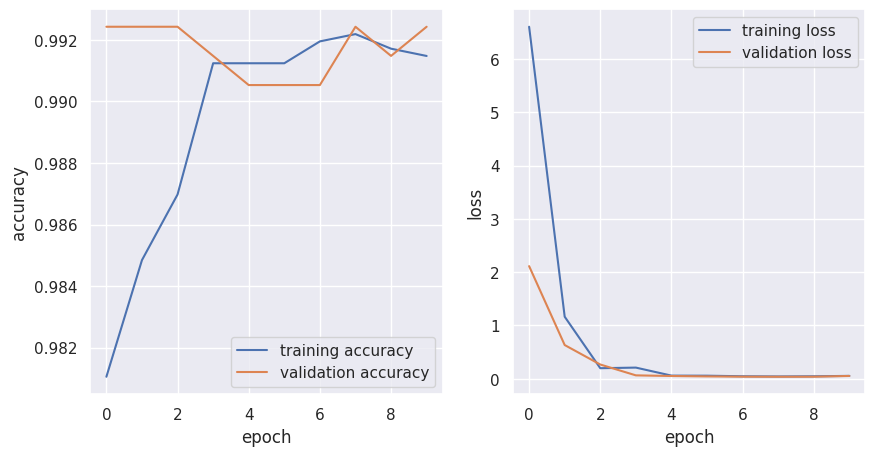

In [ ]:
# Plot accuracy and loss curves
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()



In [ ]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

cnn_score = test_accuracy*100

33/33 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9924
Test accuracy: 99.24%


33/33 [==============================] - 0s 3ms/step


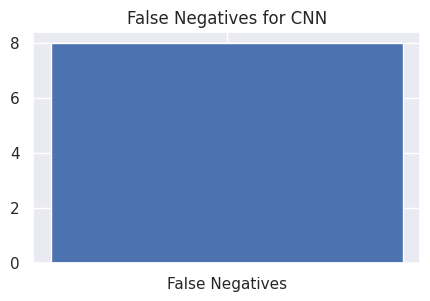

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the predicted values
y_pred = model.predict(X_test)

# Convert the predicted probabilities to classes
y_pred_classes = np.round(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Calculate the false negative values
CNN_fn_values = cm[1][0]

# Plot the false negative values
plt.figure(figsize=(5,3))
plt.bar(['False Negatives'], [CNN_fn_values])
plt.title('False Negatives for CNN')
plt.show()


# LSTM

In [ ]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))


In [ ]:

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 81, 64)            16896     
                                                                 
 dropout_1 (Dropout)         (None, 81, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 81, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 81, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [ ]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10
132/132 [==============================] - 29s 169ms/step - loss: 0.0849 - accuracy: 0.9867 - val_loss: 0.0462 - val_accuracy: 0.9924
Epoch 2/10
132/132 [==============================] - 22s 166ms/step - loss: 0.0525 - accuracy: 0.9917 - val_loss: 0.0447 - val_accuracy: 0.9924
Epoch 3/10
132/132 [==============================] - 21s 162ms/step - loss: 0.0512 - accuracy: 0.9917 - val_loss: 0.0448 - val_accuracy: 0.9924
Epoch 4/10
132/132 [==============================] - 21s 157ms/step - loss: 0.0497 - accuracy: 0.9917 - val_loss: 0.0446 - val_accuracy: 0.9924
Epoch 5/10
132/132 [==============================] - 22s 164ms/step - loss: 0.0512 - accuracy: 0.9917 - val_loss: 0.0446 - val_accuracy: 0.9924
Epoch 6/10
132/132 [==============================] - 21s 161ms/step - loss: 0.0517 - accuracy: 0.9917 - val_loss: 0.0446 - val_accuracy: 0.9924
Epoch 7/10
132/132 [==============================] - 21s 159ms/step - loss: 0.0518 - accuracy: 0.9917 - val_loss: 0.0448 - val_ac

In [ ]:
# Make predictions on the validation set
y_pred = model.predict(X_test)



33/33 [==============================] - 2s 38ms/step


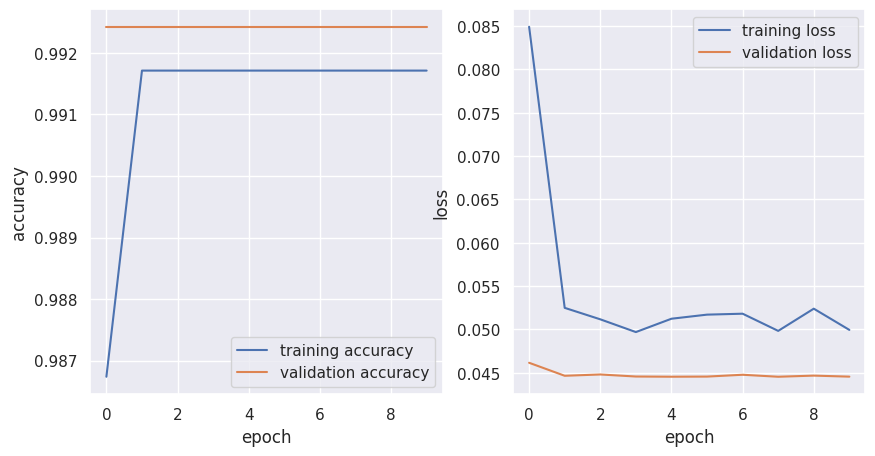

In [ ]:
# Plot accuracy and loss curves
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()



In [ ]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

lstm_score =test_accuracy*100

33/33 [==============================] - 2s 57ms/step - loss: 0.0446 - accuracy: 0.9924
Test accuracy: 99.24%


33/33 [==============================] - 1s 39ms/step


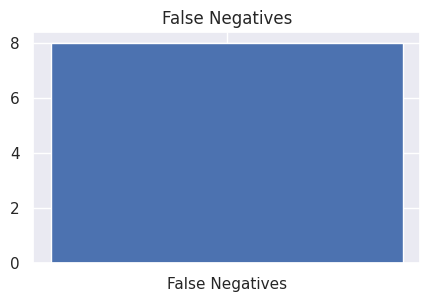

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the predicted values
y_pred = model.predict(X_test)

# Convert the predicted probabilities to classes
y_pred_classes = np.round(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Calculate the false negative values
LTSM_fn_values = cm[1][0]

# Plot the false negative values
plt.figure(figsize=(5,3))
plt.bar(['False Negatives'], [LTSM_fn_values])
plt.title('False Negatives')
plt.show()


# GRU

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout
from keras.callbacks import EarlyStopping




In [ ]:
# Define the GRU model
model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], 1), activation='tanh', dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
132/132 [==============================] - 16s 98ms/step - loss: 0.1479 - accuracy: 0.9898 - val_loss: 0.0451 - val_accuracy: 0.9924
Epoch 2/10
132/132 [==============================] - 13s 97ms/step - loss: 0.0499 - accuracy: 0.9917 - val_loss: 0.0446 - val_accuracy: 0.9924
Epoch 3/10
132/132 [==============================] - 12s 95ms/step - loss: 0.0503 - accuracy: 0.9917 - val_loss: 0.0448 - val_accuracy: 0.9924
Epoch 4/10
132/132 [==============================] - 13s 95ms/step - loss: 0.0484 - accuracy: 0.9917 - val_loss: 0.0448 - val_accuracy: 0.9924
Epoch 5/10
132/132 [==============================] - 13s 95ms/step - loss: 0.0480 - accuracy: 0.9917 - val_loss: 0.0447 - val_accuracy: 0.9924


In [ ]:
# Make predictions on the validation set
y_pred = model.predict(X_test)

33/33 [==============================] - 1s 13ms/step


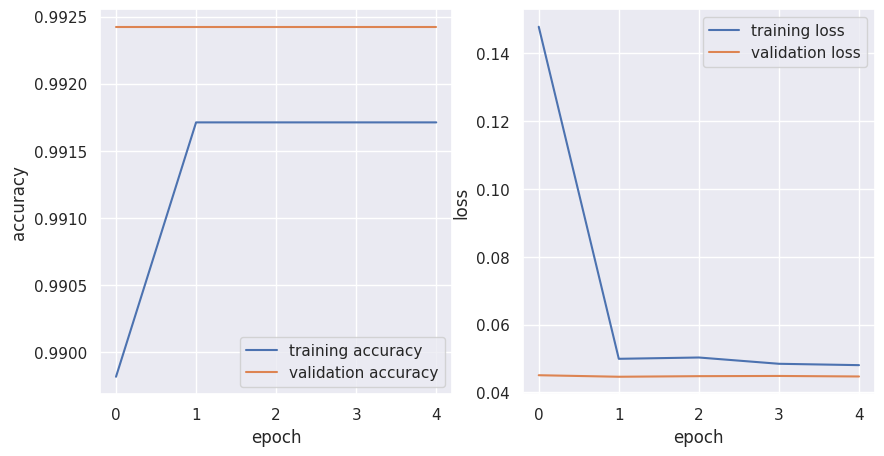

In [ ]:
# Plot accuracy and loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

gru_score = test_accuracy*100

33/33 [==============================] - 0s 14ms/step - loss: 0.0447 - accuracy: 0.9924
Test accuracy: 99.24%


33/33 [==============================] - 0s 14ms/step


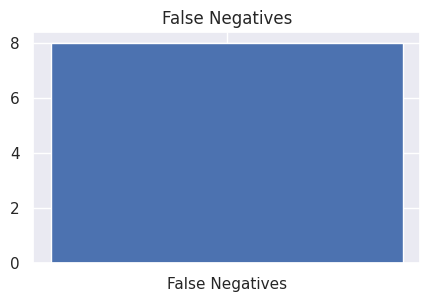

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the predicted values
y_pred = model.predict(X_test)

# Convert the predicted probabilities to classes
y_pred_classes = np.round(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Calculate the false negative values
GRU_fn_values = cm[1][0]

# Plot the false negative values
plt.figure(figsize=(5,3))
plt.bar(['False Negatives'], [GRU_fn_values])
plt.title('False Negatives')
plt.show()

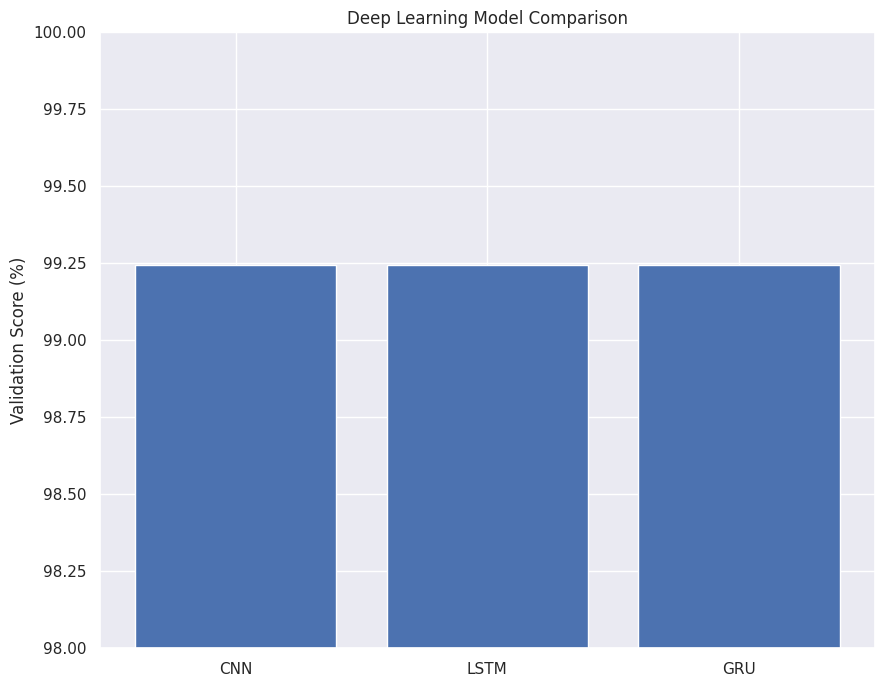

In [ ]:
# Create a figure with a size of 10 inches wide and 8 inches tall
fig, ax = plt.subplots(figsize=(10, 8))
models = ['CNN','LSTM','GRU']
scores = [cnn_score,lstm_score,gru_score]
plt.bar(models, scores)
plt.ylim(98, 100)
plt.ylabel('Validation Score (%)')
plt.title('Deep Learning Model Comparison')
plt.show()

#  Relation of Covid on Appenditics

In [ ]:
f1['COVID.19'].unique()

array([0, 1])

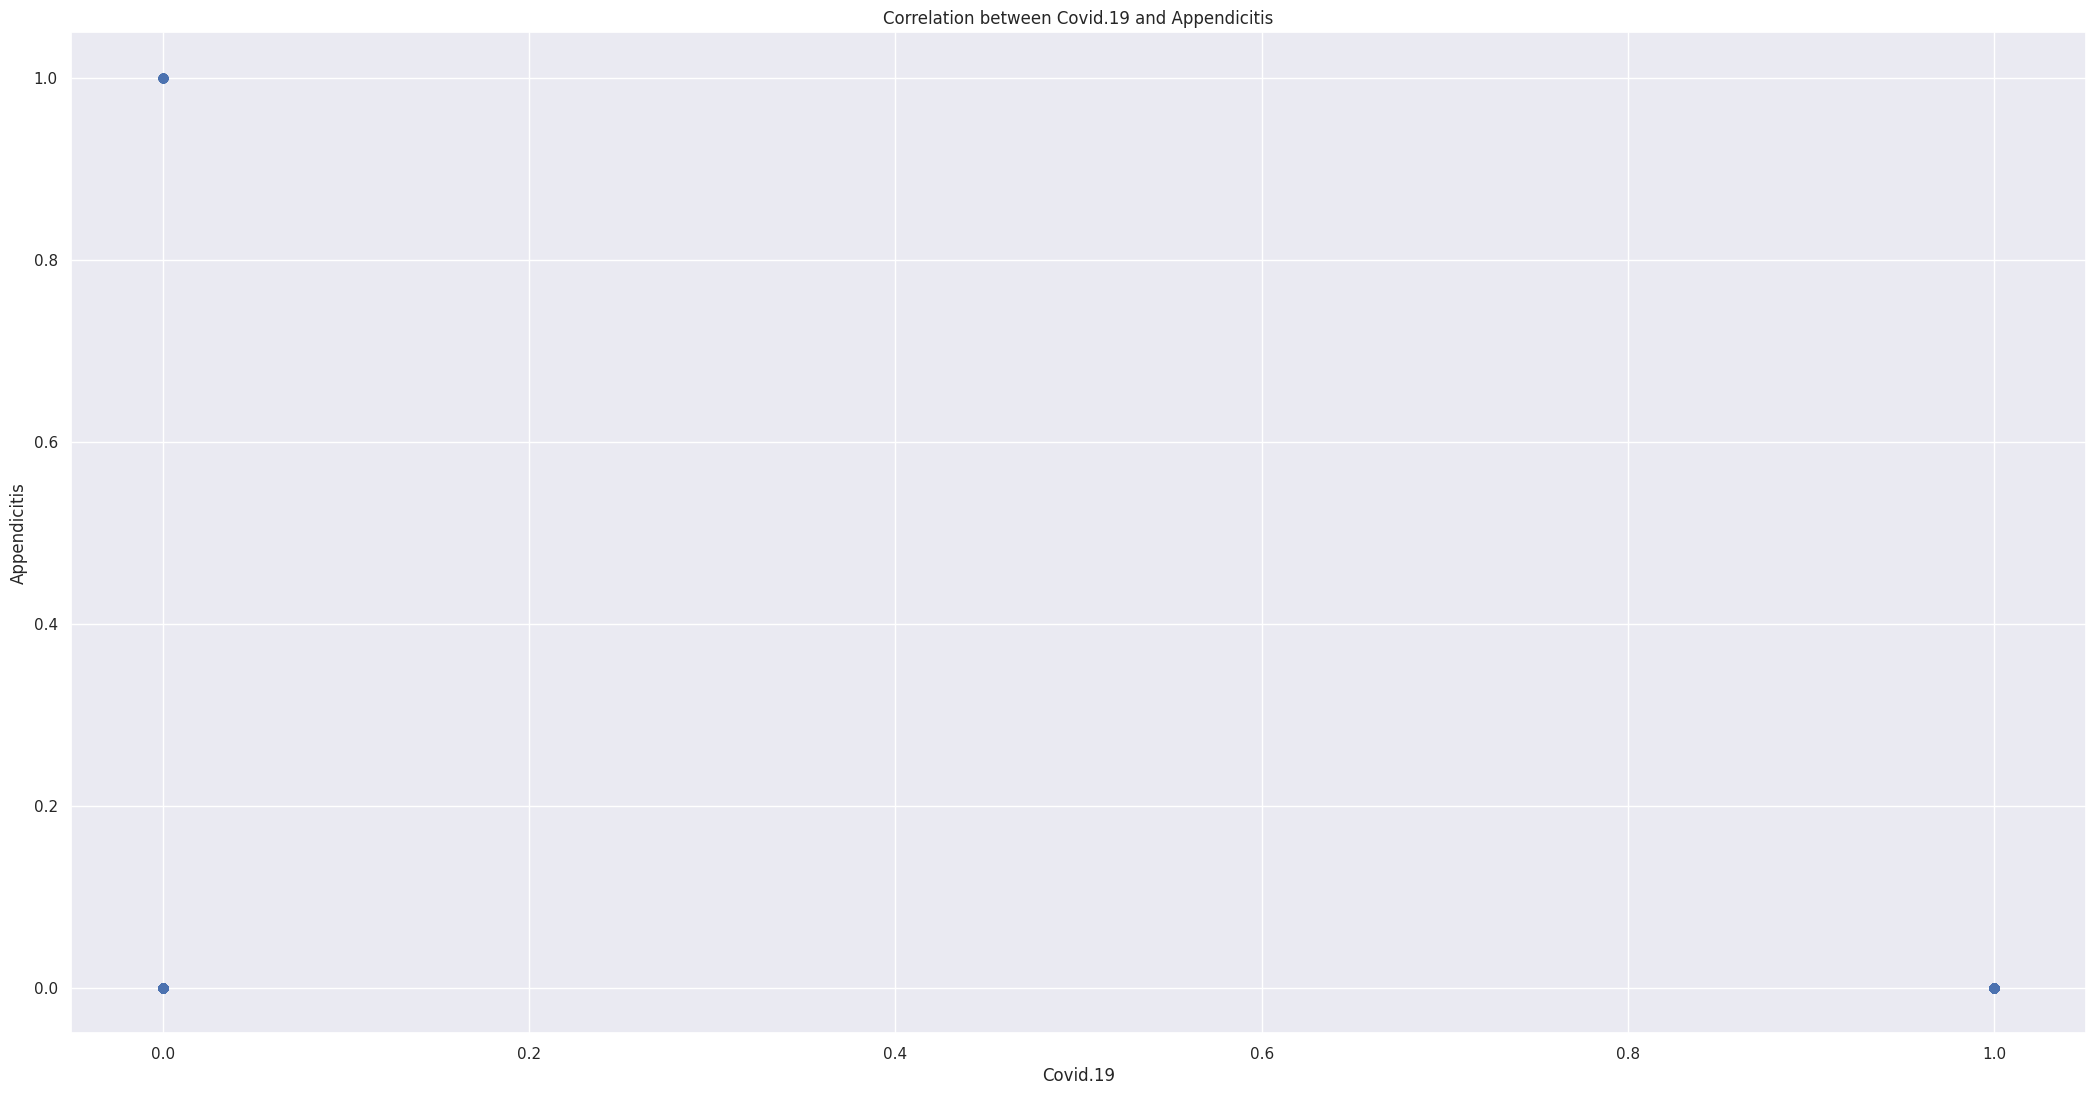

In [ ]:
# plot scatter plot
plt.scatter(f1['COVID.19'], f1['Appendicitis'])
plt.xlabel('Covid.19')
plt.ylabel('Appendicitis')
plt.title('Correlation between Covid.19 and Appendicitis')
plt.show()

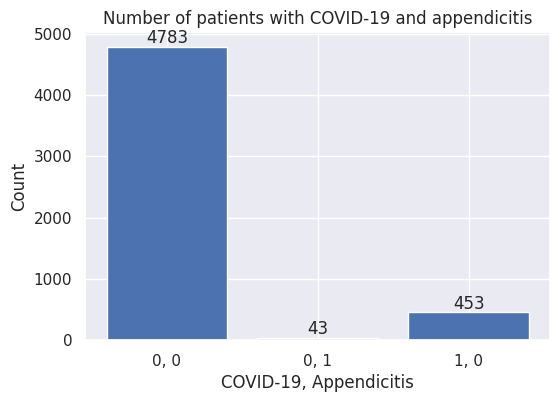

In [ ]:
# count the number of patients with appendicitis and covid
count = f1.groupby(['COVID.19', 'Appendicitis']).size().reset_index(name='Count')

# set figure size
fig, ax = plt.subplots(figsize=(6, 4))

# plot the bar chart
ax.bar(x=count['COVID.19'].astype(str) + ', ' + count['Appendicitis'].astype(str),
        height=count['Count'])
ax.set_xlabel('COVID-19, Appendicitis', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Number of patients with COVID-19 and appendicitis', fontsize=12)
for i, v in enumerate(count['Count']):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.show()


A t-test is used to compare the means of two groups of continuous data. However, if both columns are binary, we can use a chi-square test instead to determine if there is a significant association between the two variables. The chi-square test evaluates the differences between observed and expected frequencies in a contingency table, where the rows represent one variable (e.g., Covid.19) and the columns represent the other variable (e.g., Appendicitis).

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


# create a contingency table
cont_table = pd.crosstab(f1['COVID.19'], f1['Appendicitis'])

# perform chi-square test
stat, p, dof, expected = chi2_contingency(cont_table)
print(f"Chi-square statistic: {stat}")
print(f"P-value: {p}")


Chi-square statistic: 3.041280192478283
P-value: 0.08117187931082175



# Null Hypothesis : Features have no effect on the each other
# Alternative Hypothesis: Features have a significant effect
### p-value is 0.08117187931082175:


Typically, if the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant relationship between the two categorical variables.


However, in this case, the p-value is greater than 0.05, so we fail to reject the null hypothesis that the two binary columns are independent.

In [ ]:
significant_columns = []
norelation_columns = []

In [ ]:
for col in df.columns:
    # create a contingency table
    cont_table = pd.crosstab(f1[col], f1['Appendicitis'])

    # perform chi-square test
    stat, p, dof, expected = chi2_contingency(cont_table)
    print(f"Chi-square statistic: {stat}")
    print(f"P-value: {p}")
    if p <= 0.05:
        print("Null Hypothesis is Rejected \nThere is Significant relationship between Appendicitis and " +str(col) +'\n')
        significant_columns.append(col)
    else:
        print("Alternative Hypothes is Rejected \nThere is no relationship between Appendicitis and " +str(col) +'\n')
        norel_cols = col
        norelation_columns.append(col)
    print("\n**********************************\n")

Chi-square statistic: 5279.0
P-value: 0.25778470097653244
Alternative Hypothes is Rejected 
There is no relationship between Appendicitis and VAERS_ID


**********************************

Chi-square statistic: 61.195940409799334
P-value: 0.02200304424239668
Null Hypothesis is Rejected 
There is Significant relationship between Appendicitis and RECVDATE


**********************************

Chi-square statistic: 80.45704503068896
P-value: 0.011268774126361165
Null Hypothesis is Rejected 
There is Significant relationship between Appendicitis and STATE


**********************************

Chi-square statistic: 88.83919529422934
P-value: 0.45489789252941254
Alternative Hypothes is Rejected 
There is no relationship between Appendicitis and AGE_YRS


**********************************

Chi-square statistic: 127.35792384268086
P-value: 0.0038889245382714597
Null Hypothesis is Rejected 
There is Significant relationship between Appendicitis and CAGE_YR


**********************************


In [ ]:
norelation_columns

['VAERS_ID',
 'AGE_YRS',
 'CAGE_MO',
 'SEX',
 'RPT_DATE',
 'SYMPTOM_TEXT',
 'DIED',
 'DATEDIED',
 'L_THREAT',
 'ER_VISIT',
 'HOSPITAL',
 'X_STAY',
 'DISABLE',
 'VAX_DATE',
 'ONSET_DATE',
 'V_FUNDBY',
 'OTHER_MEDS',
 'CUR_ILL',
 'HISTORY',
 'PRIOR_VAX',
 'SPLTTYPE',
 'FORM_VERS',
 'BIRTH_DEFECT',
 'OFC_VISIT',
 'ER_ED_VISIT',
 'ALLERGIES',
 'VAX_TYPE',
 'VAX_MANU',
 'VAX_ROUTE',
 'VAX_SITE',
 'VAX_NAME',
 'Abortion.spontaneous',
 'Anaphylactic.reaction',
 'Arthralgia',
 'Asthenia',
 'Chest.pain',
 'Chills',
 'Cough',
 'COVID.19',
 'Diarrhoea',
 'Dizziness',
 'Facial.paralysis',
 'Fatigue',
 'Feeling.abnormal',
 'Flushing',
 'Headache',
 'Hyperhidrosis',
 'Hypoaesthesia',
 'Injection.site.erythema',
 'Injection.site.pain',
 'Injection.site.pruritus',
 'Injection.site.swelling',
 'Injection.site.warmth',
 'Loss.of.consciousness',
 'Malaise',
 'Muscular.weakness',
 'Pyrexia',
 'Rash',
 'Throat.tightness',
 'Thrombosis',
 'Tinnitus',
 'Tremor',
 'Urticaria']

In [ ]:
significant_columns

['RECVDATE',
 'STATE',
 'CAGE_YR',
 'HOSPDAYS',
 'RECOVD',
 'NUMDAYS',
 'LAB_DATA',
 'V_ADMINBY',
 'TODAYS_DATE',
 'symptom_list',
 'VAX_LOT',
 'VAX_DOSE_SERIES',
 'Appendicitis',
 'Death',
 'Dyspnoea',
 'Lymphadenopathy',
 'Nausea',
 'Pain',
 'Vomiting']

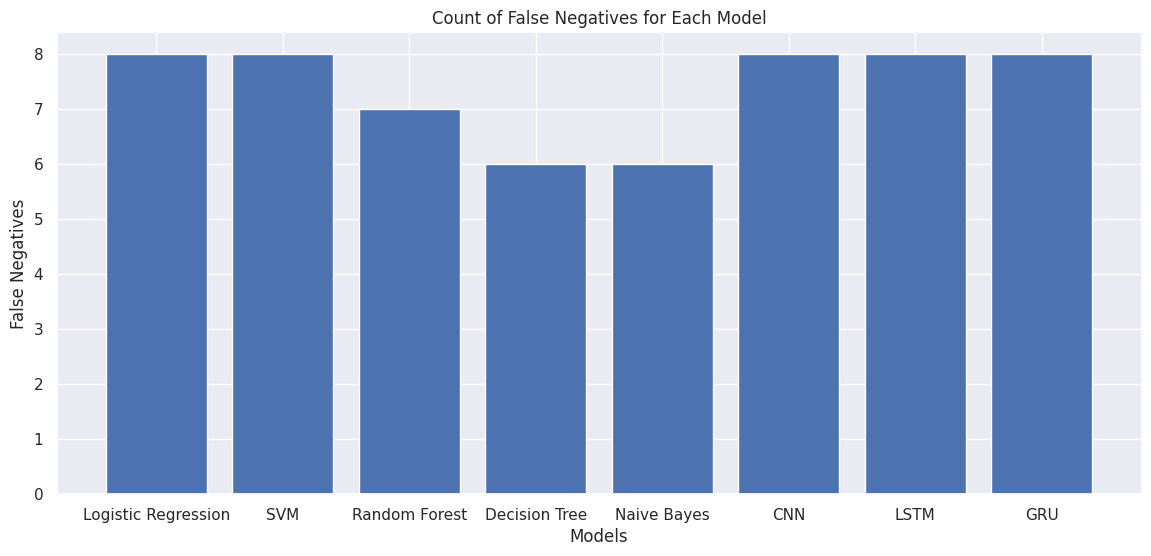

In [ ]:
from sklearn.metrics import confusion_matrix

# Create a bar chart of false negatives for each model
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(['Logistic Regression', 'SVM', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'CNN', 'LSTM', 'GRU'],
       [lr_fn, svm_fn, rf_fn, dt_fn, nb_fn, CNN_fn_values, LTSM_fn_values, GRU_fn_values])
ax.set_xlabel('Models')
ax.set_ylabel('False Negatives')
ax.set_title('Count of False Negatives for Each Model')
plt.show()